In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [50]:
df = pd.read_csv("/content/oil-prices.csv")

In [ ]:
df.head()

,Month,Consumer Price Index (1982-84=1),Motor Gasoline Price ($/gallon) Nominal,Motor Gasoline Price ($/gallon) Real
0,01-01-1999,1.65,0.94,1.79
1,01-02-1999,1.65,0.92,1.75
2,01-03-1999,1.65,0.98,1.87
3,01-04-1999,1.66,1.13,2.14
4,01-05-1999,1.66,1.13,2.14


In [61]:
tick_positions = np.arange(0, 301, 12.4)
len(tick_positions)

25

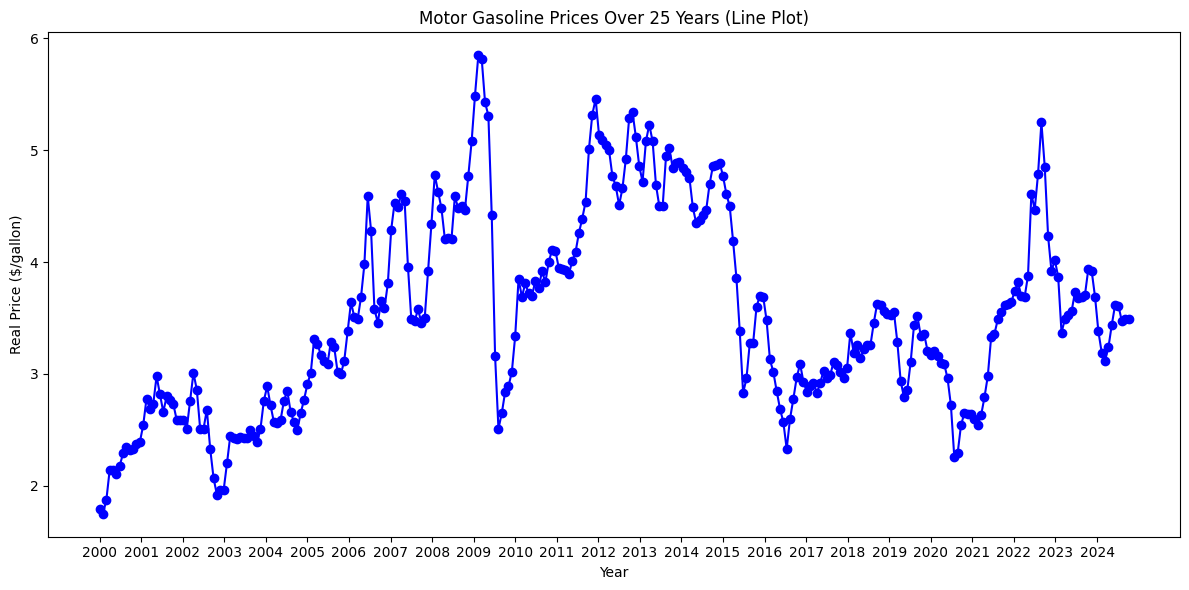

In [64]:
data = df
data.columns = data.columns.str.strip()

plt.figure(figsize=(12, 6))
plt.plot(data.Month, data['Motor Gasoline Price ($/gallon) Real'], marker='o', linestyle='-', color='b')

tick_positions = np.arange(0, 301, 12.4)
tick_labels = range(2000,2025)

plt.xticks(ticks=tick_positions, labels=tick_labels)

plt.title('Motor Gasoline Prices Over 25 Years (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Real Price ($/gallon)')
plt.tight_layout()
plt.show()


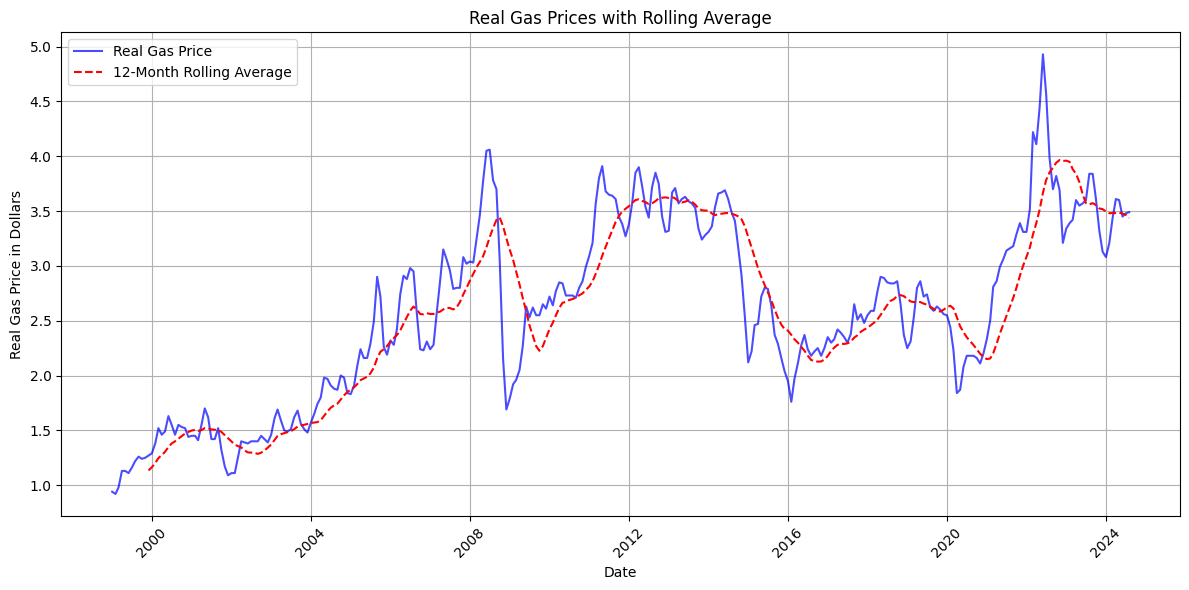

In [65]:
df.columns = ['date', 'nominal_price', 'real_price', 'cpi']
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df.set_index('date', inplace=True)

window_size = 12
df['rolling_avg_real_price'] = df['real_price'].rolling(window=window_size).mean()


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['real_price'], label='Real Gas Price', color='blue', alpha=0.7)
plt.plot(df.index, df['rolling_avg_real_price'], label=f'{window_size}-Month Rolling Average', color='red', linestyle='--')
plt.title('Real Gas Prices with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Real Gas Price in Dollars')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

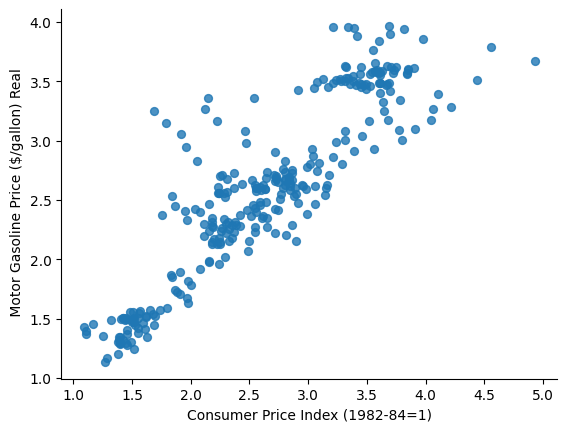

In [66]:

df.columns = ['Month', 'Consumer Price Index (1982-84=1)',
       'Motor Gasoline Price ($/gallon) Nominal',
       ' Motor Gasoline Price ($/gallon) Real']
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Consumer Price Index (1982-84=1)', y=' Motor Gasoline Price ($/gallon) Real', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

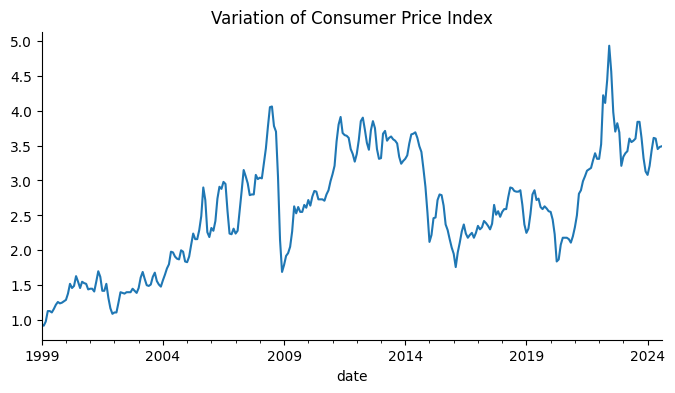

In [67]:
df.columns = ['Month', 'Consumer Price Index (1982-84=1)',
       'Motor Gasoline Price ($/gallon) Nominal',
       ' Motor Gasoline Price ($/gallon) Real']
from matplotlib import pyplot as plt
df['Consumer Price Index (1982-84=1)'].plot(kind='line', figsize=(8, 4), title='Variation of Consumer Price Index')
plt.gca().spines[['top', 'right']].set_visible(False)

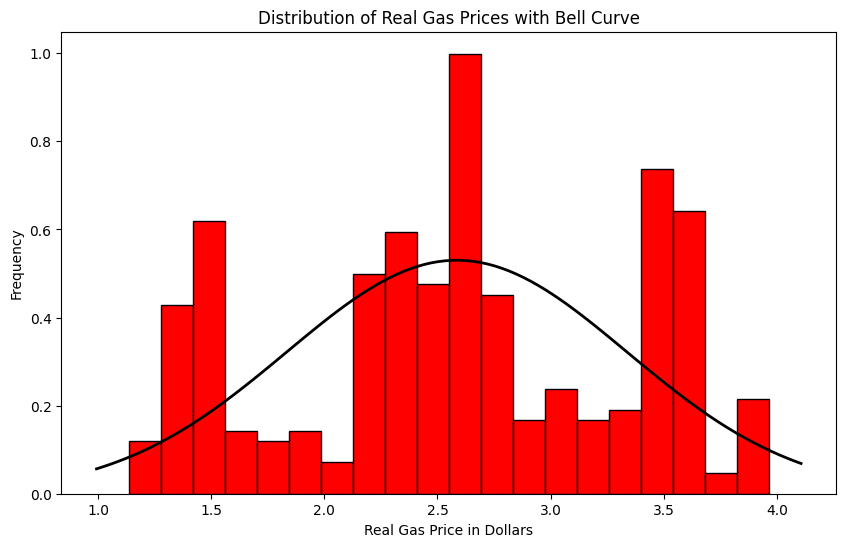

In [68]:
df.columns = ['date','CPI','nominal price','real price']
data = df['real price'].dropna()

num_bins = 20
mean, std_dev = np.mean(data), np.std(data)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=num_bins, color='red', edgecolor='black', density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)

plt.plot(x, p, 'black', linewidth=2)
plt.title('Distribution of Real Gas Prices with Bell Curve')
plt.xlabel('Real Gas Price in Dollars')
plt.ylabel('Frequency')

plt.show()